<a href="https://colab.research.google.com/github/santhosh07sk/Santhoshkumar/blob/main/Netflix_Viewing_Trends_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-244438706.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Unknown', inplace=True)
/tmp/ipython-input-244438706.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

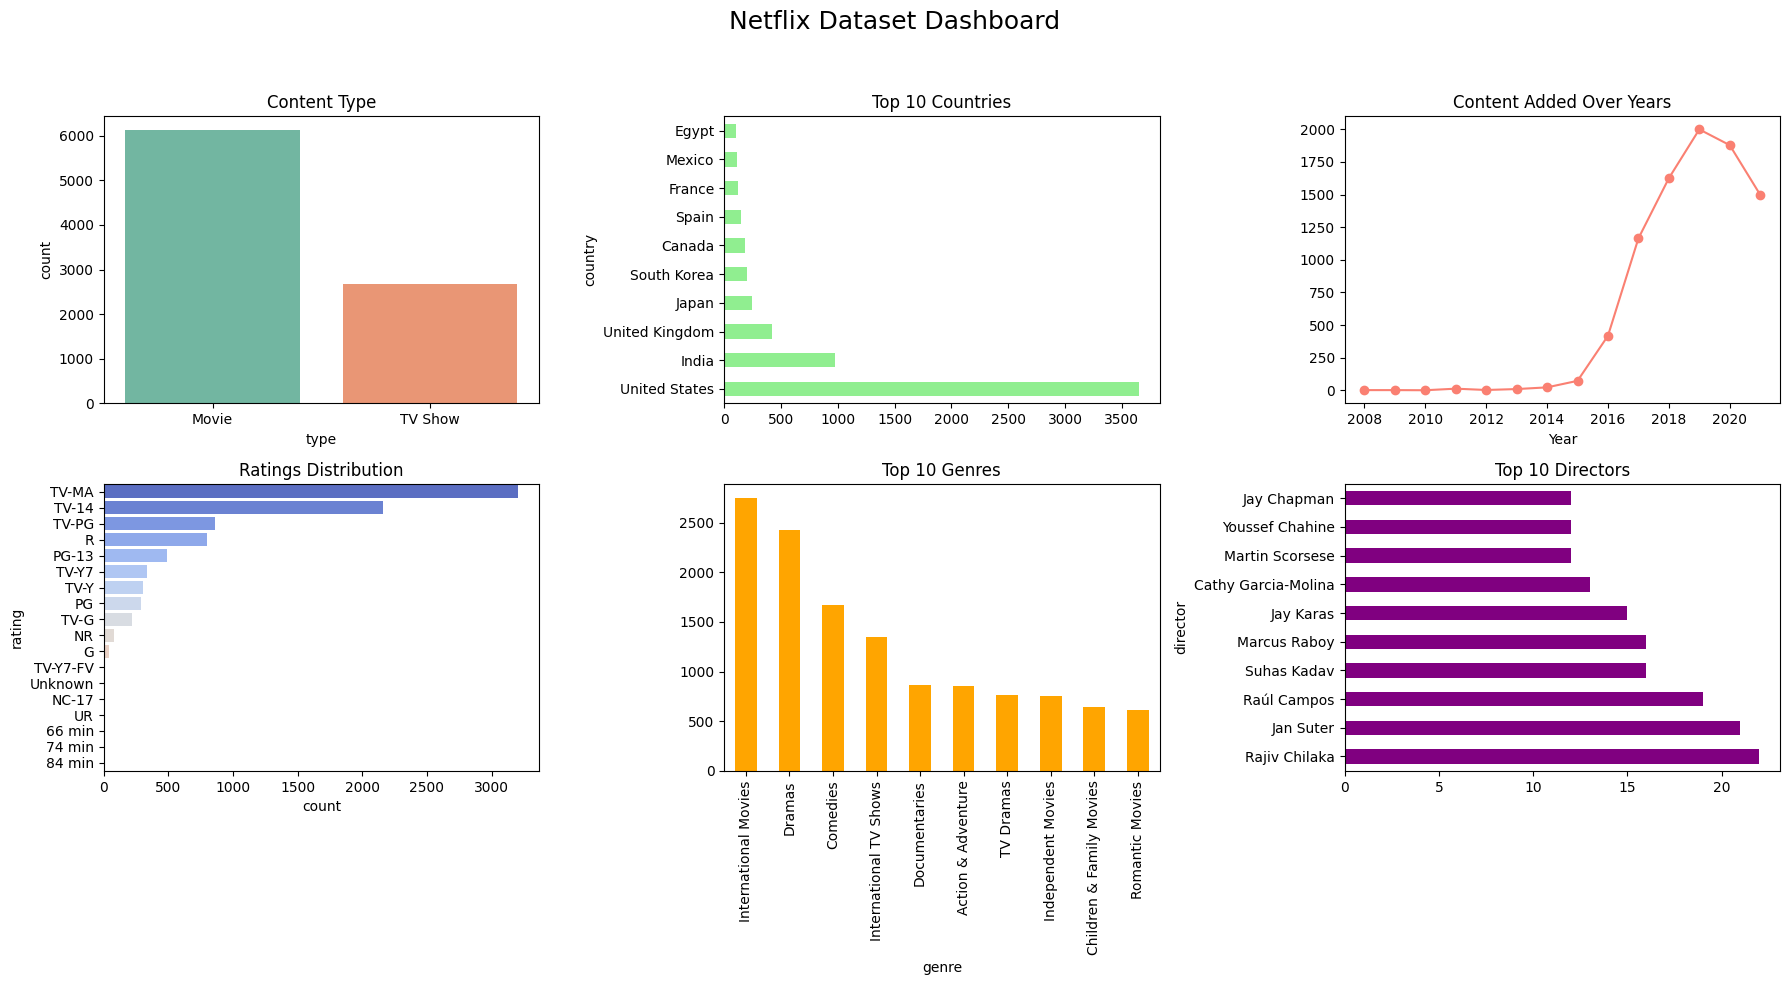

In [ ]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
# Replace 'YOUR_FILE_PATH' with the correct path to your dataset
df = pd.read_csv("/content/sample_data/Netflix..csv")
df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['rating'].fillna('Unknown', inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df_genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

# Set up the figure
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Netflix Dataset Dashboard', fontsize=18)

# Plot 1: Type count
sns.countplot(x='type', data=df, ax=axs[0, 0], palette='Set2')
axs[0, 0].set_title('Content Type')

# Plot 2: Top 10 countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Top 10 Countries')

# Plot 3: Content over years
df['year_added'].value_counts().sort_index().plot(ax=axs[0, 2], marker='o', color='salmon')
axs[0, 2].set_title('Content Added Over Years')
axs[0, 2].set_xlabel('Year')

# Plot 4: Ratings distribution
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, ax=axs[1, 0], palette='coolwarm')
axs[1, 0].set_title('Ratings Distribution')

# Plot 5: Top Genres
df_genres['genre'].value_counts().head(10).plot(kind='bar', ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Top 10 Genres')

# Plot 6: Top Directors (Optional)
top_directors = df['director'].dropna().str.split(', ').explode().value_counts().head(10)
top_directors.plot(kind='barh', ax=axs[1, 2], color='purple')
axs[1, 2].set_title('Top 10 Directors')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()